# Limpieza de datos - Agrupación de datos

## Resumen

+ Un dummy dataframe con variables categóricas
+ Agrupación de los datos por categorías
+ Agregación de datos
+ Filtrado, transformación y otras operaciones útiles
+ Muestreo aleatorio: cómo dividir un dataset en conjunto de entrenamiento y validación

## Agregación de datos por categoría

Vamos a aprovechar lo que hemos aprendido en la generación de dummy datasets para crear estos dataframes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

n = 500
gender_data = []
income_data = []

for i in range(500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [3]:
gender_data[:10]

['Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male']

In [4]:
income_data[:10]

['Poor',
 'Rich',
 'Rich',
 'Poor',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Poor',
 'Middle Class',
 'Poor']

In [5]:
# Seguimos creando otras variables
# Z --> N(0, 1)
# N(m, s) --> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [6]:
# Creamos el dataframe
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": income
    })

In [7]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,159.490721,101.533549,41.044852,15276.581013
1,Male,Rich,145.512940,12.982822,22.106036,19272.847798
2,Female,Rich,155.233843,98.153385,26.162546,10971.793782
3,Male,Poor,201.143012,44.603005,29.178817,17488.040298
4,Male,Middle Class,166.348997,64.215580,33.659026,21374.758615


## Agrupación de datos

In [8]:
grouped_gender = data.groupby("Gender")

In [9]:
grouped_gender.groups

{'Female': Int64Index([  2,   5,   6,  11,  13,  20,  22,  26,  27,  28,
             ...
             484, 485, 486, 487, 489, 490, 491, 492, 495, 497],
            dtype='int64', length=237),
 'Male': Int64Index([  0,   1,   3,   4,   7,   8,   9,  10,  12,  14,
             ...
             472, 474, 481, 483, 488, 493, 494, 496, 498, 499],
            dtype='int64', length=263)}

In [10]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
2    Female            Rich  155.233843   98.153385  26.162546  10971.793782
5    Female    Middle Class  122.609264  100.343465  35.848603  22329.083220
6    Female            Poor  186.378891   95.907936  34.682573  16860.784220
11   Female            Poor  146.972237   42.578706  24.388751  17351.689843
13   Female            Poor  158.361935   39.569407  25.562413  13922.654065
20   Female    Middle Class  217.394476   62.043187  36.644524  14383.995610
22   Female    Middle Class  184.782987  108.377472  39.374785  18114.409927
26   Female            Poor  101.484281   19.893039  24.862739  21853.414609
27   Female            Poor  150.220946   23.644030  32.054206  19397.868290
28   Female            Rich  139.480982   95.985398   7.575081   9346.158459
29   Female            Rich  161.147230   45.073416  47.316933  23262.691876
30   Female            Poor  158.204441   17.081049  11.184559  20912

In [11]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
2,Female,Rich,155.233843,98.153385,26.162546,10971.793782
5,Female,Middle Class,122.609264,100.343465,35.848603,22329.083220
6,Female,Poor,186.378891,95.907936,34.682573,16860.784220
11,Female,Poor,146.972237,42.578706,24.388751,17351.689843
13,Female,Poor,158.361935,39.569407,25.562413,13922.654065
20,Female,Middle Class,217.394476,62.043187,36.644524,14383.995610
22,Female,Middle Class,184.782987,108.377472,39.374785,18114.409927
26,Female,Poor,101.484281,19.893039,24.862739,21853.414609
27,Female,Poor,150.220946,23.644030,32.054206,19397.868290
28,Female,Rich,139.480982,95.985398,7.575081,9346.158459


In [12]:
double_group = data.groupby(["Gender", "Economic Status"])

In [13]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
5    Female    Middle Class  122.609264  100.343465  35.848603  22329.083220
20   Female    Middle Class  217.394476   62.043187  36.644524  14383.995610
22   Female    Middle Class  184.782987  108.377472  39.374785  18114.409927
38   Female    Middle Class  156.132583   32.711290  36.357382  17649.382442
42   Female    Middle Class  157.058870   60.240719  15.573177  22995.757609
44   Female    Middle Class  161.465251  114.442516  28.606919  18447.408622
46   Female    Middle Class  138.421880   77.824444  14.873118  15802.712649
48   Female    Middle Class  128.482354   37.121166  17.761075  17191.736949
56   Female    Middle Class  174.201405   45.475553  40.445223  19141.786252
68   Female    Middle Class  146.121711  105.056819  39.708420  22596.200425
73   Female    Middle Class  139.541220   57.667478  30.363866  16217.856281
95   Female    Middle Class  161.079865   62.7716

## Operaciones sobre datos agrupados

In [14]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     11460.321589  5292.883723  2177.804260  1.316918e+06
       Poor             11880.127848  4361.701369  2162.760802  1.327714e+06
       Rich             15011.711578  6106.590512  2720.697237  1.655242e+06
Male   Middle Class     12476.088810  4952.743401  2390.020923  1.444720e+06
       Poor             15087.282341  5771.912627  3049.565855  1.783895e+06
       Rich             14333.004209  5821.434357  2529.916218  1.604080e+06

In [15]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     156.990707  72.505256  29.832935  18039.974208
       Poor             162.741477  59.749334  29.626860  18187.856298
       Rich             164.963863  67.105390  29.897772  18189.472358
Male   Middle Class     159.949857  63.496710  30.641294  18522.054573
       Poor             157.159191  60.124090  31.766311  18582.240776
       Rich             161.044991  65.409375  28.426025  18023.373854

In [16]:
double_group.size()

Gender  Economic Status
Female  Middle Class       73
        Poor               73
        Rich               91
Male    Middle Class       78
        Poor               96
        Rich               89
dtype: int64

In [17]:
double_group.describe()

Age                                             \
                       count       mean        std       min        25%   
Gender Economic Status                                                    
Female Middle Class     73.0  29.832935  10.184974  7.335381  21.228733   
       Poor             73.0  29.626860  12.587184  5.083920  21.643604   
       Rich             91.0  29.897772  12.642043 -6.991116  21.437545   
Male   Middle Class     78.0  30.641294  11.997854  6.120686  22.681310   
       Poor             96.0  31.766311  13.048457 -2.673226  23.936842   
       Rich             89.0  28.426025  12.310736  6.954940  19.416240   

                                                        Height              \
                              50%        75%        max  count        mean   
Gender Economic Status                                                       
Female Middle Class     31.375059  37.320053  50.257606   73.0  156.990707   
       Poor             29.125684  35.748646  61.747729   73.0  162.741477   
       Rich             30.165700  39.437201  62.185411   91.0  164.963863   
Male   Middle Class     31.786595  39.365438  56.299271   78.0  159.949857   
       Poor             32.307598  40.193262  67.839478   96.0  157.159191   
       Rich             27.717142  36.022243  57.295380   89.0  161.044991   

                           ...            Income               Weight  \
                           ...               75%           max  count   
Gender Economic Status     ...                                          
Female Middle Class        ...      19184.063544  25856.894447   73.0   
       Poor                ...      20067.103469  29861.332962   73.0   
       Rich                ...      20970.124466  29792.070366   91.0   
Male   Middle Class        ...      21326.764261  25020.070221   78.0   
       Poor                ...      21087.788962  25506.656528   96.0   
       Rich                ...      20051.361842  26705.602295   89.0   

                                                                               \
                             mean        std        min        25%        50%   
Gender Economic Status                                                          
Female Middle Class     72.505256  25.281134  21.027264  54.884505  73.970679   
       Poor             59.749334  27.570377   3.527487  41.196432  57.955953   
       Rich             67.105390  26.281934  -8.231057  46.881019  66.958570   
Male   Middle Class     63.496710  27.818810  -8.771869  44.968337  63.527326   
       Poor             60.124090  24.044501  -5.166460  44.569824  61.959394   
       Rich             65.409375  24.904403   1.003466  52.476848  67.961506   

                                               
                              75%         max  
Gender Economic Status                         
Female Middle Class     88.964000  133.895283  
       Poor             77.032087  124.830191  
       Rich             87.342967  122.639697  
Male   Middle Class     78.009101  126.776024  
       Poor             77.675468  113.929690  
       Rich             79.010845  137.181301  

[6 rows x 32 columns]

In [18]:
grouped_income = double_group["Income"]

In [19]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      73.0  18039.974208  2806.453399  10659.976459   
       Poor              73.0  18187.856298  3408.876501  10377.109382   
       Rich              91.0  18189.472358  3805.193311   9346.158459   
Male   Middle Class      78.0  18522.054573  3423.380427  11328.025010   
       Poor              96.0  18582.240776  3549.368605  10000.330771   
       Rich              89.0  18023.373854  3353.063386   8866.810750   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     16150.905022  18114.409927  19184.063544  25856.894447  
       Poor             15973.895274  17546.981152  20067.103469  29861.332962  
       Rich             15805.381603  18960.603098  20970.124466  29792.070366  
Male   Middle Class     16096.683663  18354.743447  21326.764261  25020.070221  
       Poor             15821.742780  18538.614717  21087.788962  25506.656528  
       Rich             15621.814479  18049.226445  20051.361842  26705.602295

In [20]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.316918e+06  29.832935  30.141526
       Poor             1.327714e+06  29.626860  30.834934
       Rich             1.655242e+06  29.897772  29.408831
Male   Middle Class     1.444720e+06  30.641294  28.423249
       Poor             1.783895e+06  31.766311  28.191376
       Rich             1.604080e+06  28.426025  26.373824

In [21]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h: np.mean(h)/np.std(h)
    })

Age    Height
Gender Economic Status                     
Female Middle Class     29.832935  5.244498
       Poor             29.626860  5.314353
       Rich             29.897772  5.640408
Male   Middle Class     30.641294  5.663854
       Poor             31.766311  5.603990
       Rich             28.426025  6.140840

In [22]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     11460.321589  156.990707  30.141526  5292.883723   
       Poor             11880.127848  162.741477  30.834934  4361.701369   
       Rich             15011.711578  164.963863  29.408831  6106.590512   
Male   Middle Class     12476.088810  159.949857  28.423249  4952.743401   
       Poor             15087.282341  157.159191  28.191376  5771.912627   
       Rich             14333.004209  161.044991  26.373824  5821.434357   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     72.505256  25.281134  2177.804260  29.832935   
       Poor             59.749334  27.570377  2162.760802  29.626860   
       Rich             67.105390  26.281934  2720.697237  29.897772   
Male   Middle Class     63.496710  27.818810  2390.020923  30.641294   
       Poor             60.124090  24.044501  3049.565855  31.766311   
       Rich             65.409375  24.904403  2529.916218  28.426025   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     10.184974  1.316918e+06  18039.974208  2806.453399  
       Poor             12.587184  1.327714e+06  18187.856298  3408.876501  
       Rich             12.642043  1.655242e+06  18189.472358  3805.193311  
Male   Middle Class     11.997854  1.444720e+06  18522.054573  3423.380427  
       Poor             13.048457  1.783895e+06  18582.240776  3549.368605  
       Rich             12.310736  1.604080e+06  18023.373854  3353.063386

## Filtrado de datos

In [23]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     11460.321589  5292.883723  2177.804260  1.316918e+06
       Poor             11880.127848  4361.701369  2162.760802  1.327714e+06
       Rich             15011.711578  6106.590512  2720.697237  1.655242e+06
Male   Middle Class     12476.088810  4952.743401  2390.020923  1.444720e+06
       Poor             15087.282341  5771.912627  3049.565855  1.783895e+06
       Rich             14333.004209  5821.434357  2529.916218  1.604080e+06

In [24]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      41.044852
1      22.106036
2      26.162546
3      29.178817
7      47.203240
9      12.416811
10     15.905432
15      9.215941
17     29.647037
18     40.114954
19     44.013952
21      9.544901
24     33.129263
25     13.572388
28      7.575081
29     47.316933
31     11.353751
33     15.486129
35      9.805562
37     47.251463
39     12.693016
40     35.456290
41     35.026779
45     32.859792
47     41.674665
49     15.698921
51     12.056850
52     37.032655
53     31.586960
54     28.537809
         ...    
446    50.781188
447    20.709290
448    47.803848
449    36.022243
450    13.649572
453    33.614109
454    14.911137
455    33.638386
456    42.326512
458    27.114708
459    15.623116
463    23.148623
464    25.896080
465    51.925158
467    26.357019
468    20.213883
469    21.707194
472    59.437054
473    34.379835
474    18.161900
476    40.620640
478    34.422058
483    13.725826
485    21.033651
487    28.772609
488    39.242167
494     9.424842
496    25.3709

## Transformación de variables

In [25]:
zscore = lambda x: (x - x.mean()) / x.std()

In [26]:
double_group.transform(zscore)

,Height,Weight,Age,Income
0,0.082704,1.722201,0.711083,-0.931337
1,-0.588919,-2.105112,-0.513372,0.372637
2,-0.330854,1.181344,-0.295461,-1.896797
3,1.560187,-0.645515,-0.198299,-0.308280
4,0.225138,0.025841,0.251523,0.833300
5,-1.140667,1.101146,0.590641,1.528302
6,0.766579,1.311502,0.401656,-0.389299
7,-0.099707,1.860584,1.183046,-1.613652
8,0.780404,0.480376,0.387156,0.944430
9,0.401874,0.413261,-1.482896,0.460067


(array([  2.,  13.,  47.,  76.,  85., 121.,  89.,  42.,  19.,   6.]),
 array([-2.91795317, -2.34970244, -1.78145171, -1.21320098, -0.64495025,
        -0.07669951,  0.49155122,  1.05980195,  1.62805268,  2.19630341,
         2.76455414]),
 <a list of 10 Patch objects>)

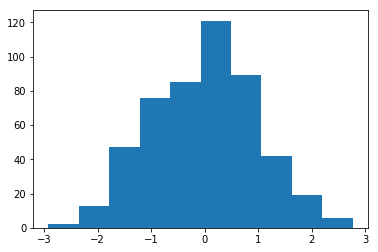

In [27]:
z_group = double_group.transform(zscore)
plt.hist(z_group["Age"])

## Operaciones diversas útiles

In [28]:
double_group.head(1)   # Muestra el primero de cada uno de los grupos

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,159.490721,101.533549,41.044852,15276.581013
1,Male,Rich,145.512940,12.982822,22.106036,19272.847798
2,Female,Rich,155.233843,98.153385,26.162546,10971.793782
4,Male,Middle Class,166.348997,64.215580,33.659026,21374.758615
5,Female,Middle Class,122.609264,100.343465,35.848603,22329.083220
6,Female,Poor,186.378891,95.907936,34.682573,16860.784220


In [29]:
double_group.tail(1)   # Muestra el último de cada uno de los grupos

,Gender,Economic Status,Height,Weight,Age,Income
487,Female,Rich,169.557974,98.417674,28.772609,24433.014253
493,Male,Middle Class,187.118483,43.097676,14.230727,18871.823742
495,Female,Poor,222.016868,47.917652,39.339113,16236.890074
496,Male,Poor,131.575654,74.790983,25.370949,19809.597398
497,Female,Middle Class,121.742148,73.645651,12.709038,15960.238638
499,Male,Rich,152.783261,81.015140,15.575597,14531.387302


In [30]:
double_group.nth(32)  # Muestra el elemento 32

Age      Height        Income      Weight
Gender Economic Status                                                 
Female Middle Class     34.321058  123.313753  21768.517268   86.845649
       Poor             48.935281  178.943188  22168.898778   34.401637
       Rich             41.727446  171.208479  23011.738283   54.246934
Male   Middle Class     42.671656  119.528331  15356.599281   65.982723
       Poor             13.906011  117.669503  20062.870791  109.562513
       Rich             10.075040  152.793638  16375.366901   84.296464

In [31]:
data_sorted = data.sort_values(["Age", "Income"])
data_sorted.head()

,Gender,Economic Status,Height,Weight,Age,Income
339,Female,Rich,137.358351,87.456129,-6.991116,16617.678535
145,Male,Poor,145.156295,66.854076,-2.673226,22899.140172
353,Female,Rich,168.567799,81.532152,3.646937,21821.299138
311,Male,Poor,165.690409,78.831541,4.068142,17014.093932
81,Female,Rich,175.369644,100.289093,4.498476,20306.930988


In [32]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
339,Female,Rich,137.358351,87.456129,-6.991116,16617.678535
145,Male,Poor,145.156295,66.854076,-2.673226,22899.140172
353,Female,Rich,168.567799,81.532152,3.646937,21821.299138
311,Male,Poor,165.690409,78.831541,4.068142,17014.093932
81,Female,Rich,175.369644,100.289093,4.498476,20306.930988
358,Female,Poor,139.916459,3.527487,5.083920,23040.482501
187,Male,Poor,140.036492,68.967379,5.157775,25456.856914
297,Female,Poor,171.653470,68.546414,5.921352,21022.604143
232,Male,Middle Class,130.157423,59.343855,6.120686,21012.845321
65,Male,Poor,137.754765,34.922676,6.780744,23802.959572


## Conjunto de entrenamiento y conjunto de testing

In [33]:
data = pd.read_csv("./data/customer-churn-model/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### 1er Método: Dividir utilizando la distribución normal

(array([   2.,   14.,  118.,  475.,  853., 1020.,  618.,  201.,   27.,
           5.]),
 array([-4.11815141, -3.31879709, -2.51944277, -1.72008845, -0.92073414,
        -0.12137982,  0.6779745 ,  1.47732882,  2.27668314,  3.07603746,
         3.87539178]),
 <a list of 10 Patch objects>)

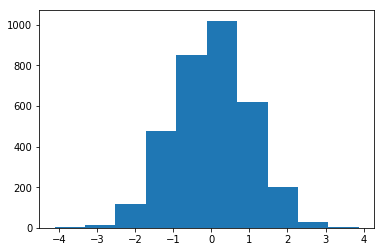

In [34]:
a = np.random.randn(len(data))
plt.hist(a)

In [38]:
# Con esto seleccionamos aquellos valores menores de 0.75. Al ser una distribución normal, se corresponderían con el 75%
check = (a < 0.75)
check

array([ True,  True,  True, ..., False,  True, False])

plt.hist(check)

In [42]:
training = data[check]
testing = data[~check]   # el símbolo ~ se obtiene con Alt Gr + 4

In [43]:
len(training)

2555

In [44]:
len(testing)

778

In [51]:
len(training)/len(data) * 100   # Porcentaje de registros para el dataset de entrenamiento

76.65766576657666

In [53]:
len(testing)/len(data) * 100    # Porcentaje de registros para el dataset de testing

23.342334233423344

## Con la librería sklearn

In [54]:
from sklearn.cross_validation import train_test_split

In [56]:
train, test = train_test_split(data, test_size=0.2)   # Se indica que el tamaño del df de test sea del 20% del total

In [58]:
len(train)/len(data) * 100   # Porcentaje de registros para el dataset de entrenamiento

79.98799879987999

In [59]:
len(test)/len(data) * 100    # Porcentaje de registros para el dataset de testing

20.01200120012001

## Usando una función de shuffle

In [60]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [66]:
import sklearn

data2 = sklearn.utils.shuffle(data)
data2.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2627,AK,86,408,389-4602,no,no,0,150.8,85,25.64,...,88,25.15,247.2,104,11.12,12.5,1,3.38,1,False.
2760,IL,137,408,352-5787,yes,no,0,237.3,103,40.34,...,84,15.02,263.4,81,11.85,14.2,4,3.83,0,True.
479,ID,99,408,400-1367,no,no,0,190.4,102,32.37,...,107,13.44,271.5,92,12.22,11.2,4,3.02,2,False.
516,MS,96,510,420-5990,no,no,0,98.2,100,16.69,...,88,26.11,182.5,120,8.21,7.6,1,2.05,2,False.
812,AK,156,510,341-4075,no,no,0,123.7,96,21.03,...,80,8.76,189.4,82,8.52,13.1,4,3.54,1,False.


In [72]:
cut_id = int(0.75 * len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [73]:
len(train_data)/len(data) * 100   # Porcentaje de registros para el dataset de entrenamiento

74.97749774977498

In [74]:
len(test_data)/len(data) * 100    # Porcentaje de registros para el dataset de testing

24.992499249924993